 ## Import data and python packages

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
# Import data yang dibutuhkan
df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['telecom_churn.csv']))

In [ ]:
# Melihat jumlah baris dan kolom
df.shape

(3333, 11)

In [ ]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


Dari info tersebut terlihat bahwa tidak ada data yang Null serta seluruh data memiliki tipe numeric

## Mengecek Outlier

In [ ]:
# Mengecek outlier
import scipy.stats as stats
df[(np.abs(stats.zscore(df)) > 3).all(axis=1)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


Tidak terdapat outliers pada data tersebut. Selain itu, seluruh data yang ada juga dapat dijelaskan.

## Exploratory Data Analysis 

Sekarang kita akan menemukan dan melihat hubungan apa yang bisa dianalisis dengan variabel-variabelnya. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


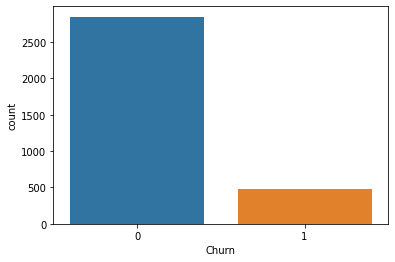

In [ ]:
sns.countplot(df['Churn'])

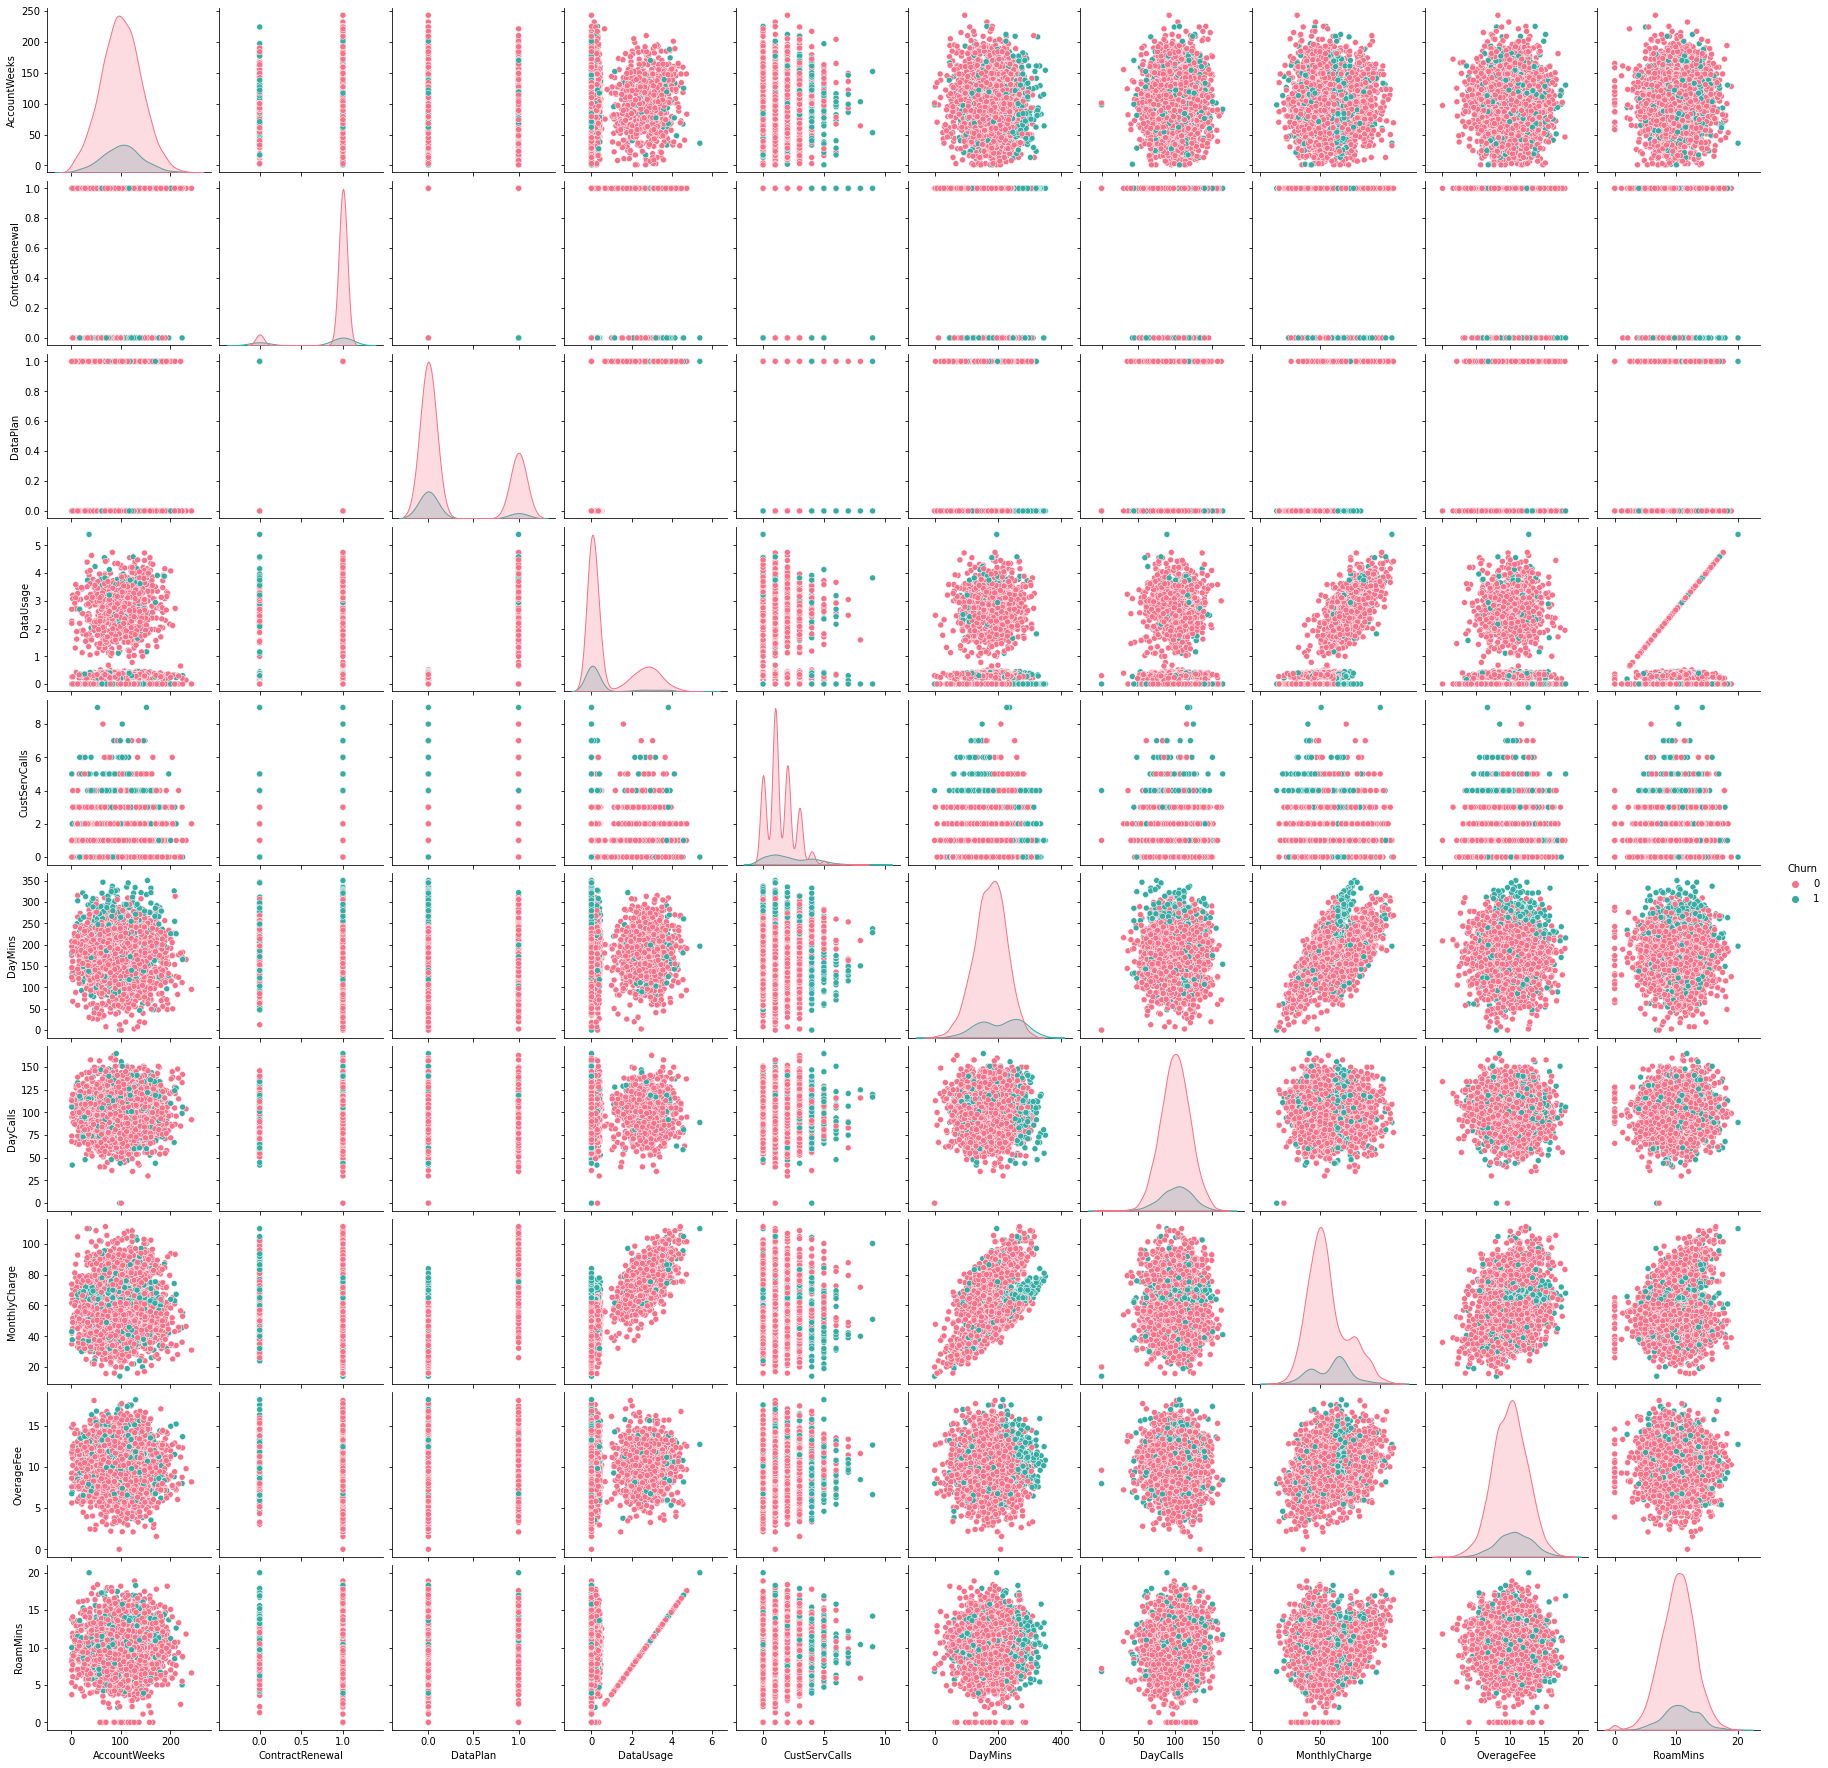

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="Churn", palette="husl")

## Hasil dari Density graph:

1. Daymins dan MonthlyCharge akan berguna untuk memisahkan kelompok
2. DataUsage mempunyai banyak nilai di angka 0 dan memiliki hubungan linear dengan RoamMins
3. CustServCalls memiliki nilai paling tinggi di angka 2


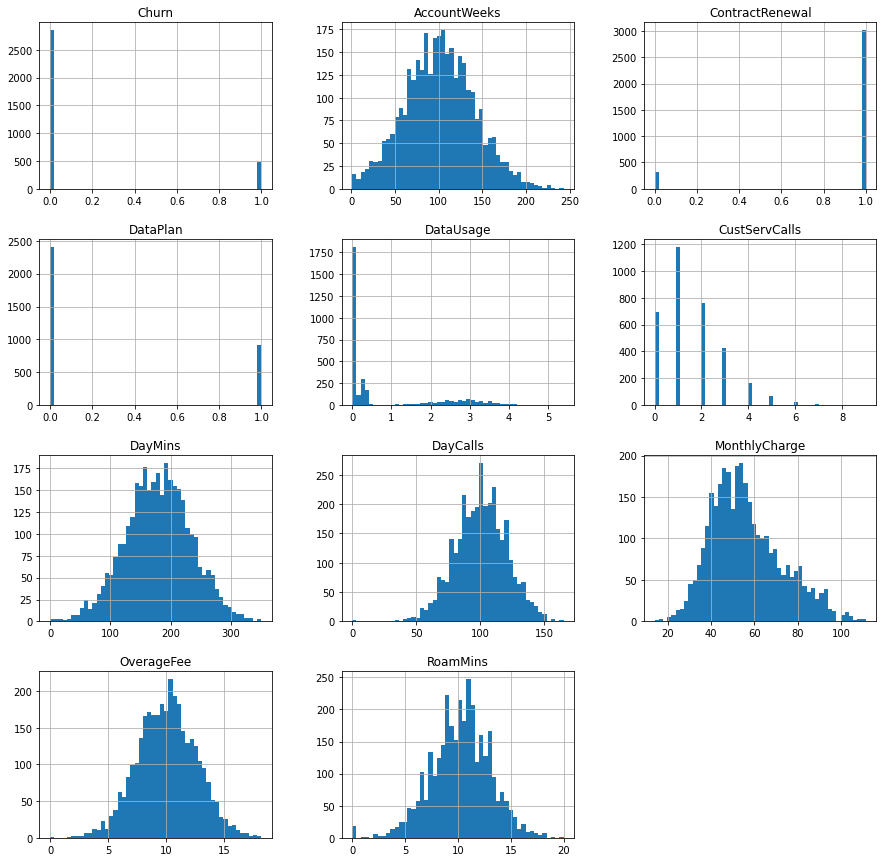

In [ ]:
df.hist(
    figsize=(15,15)
    , bins=50
);

## Hasil dari Histogram graph:

kolom diatas terlihat rata-rata terdistribusi normal (gaussian), tidak perlu log transform

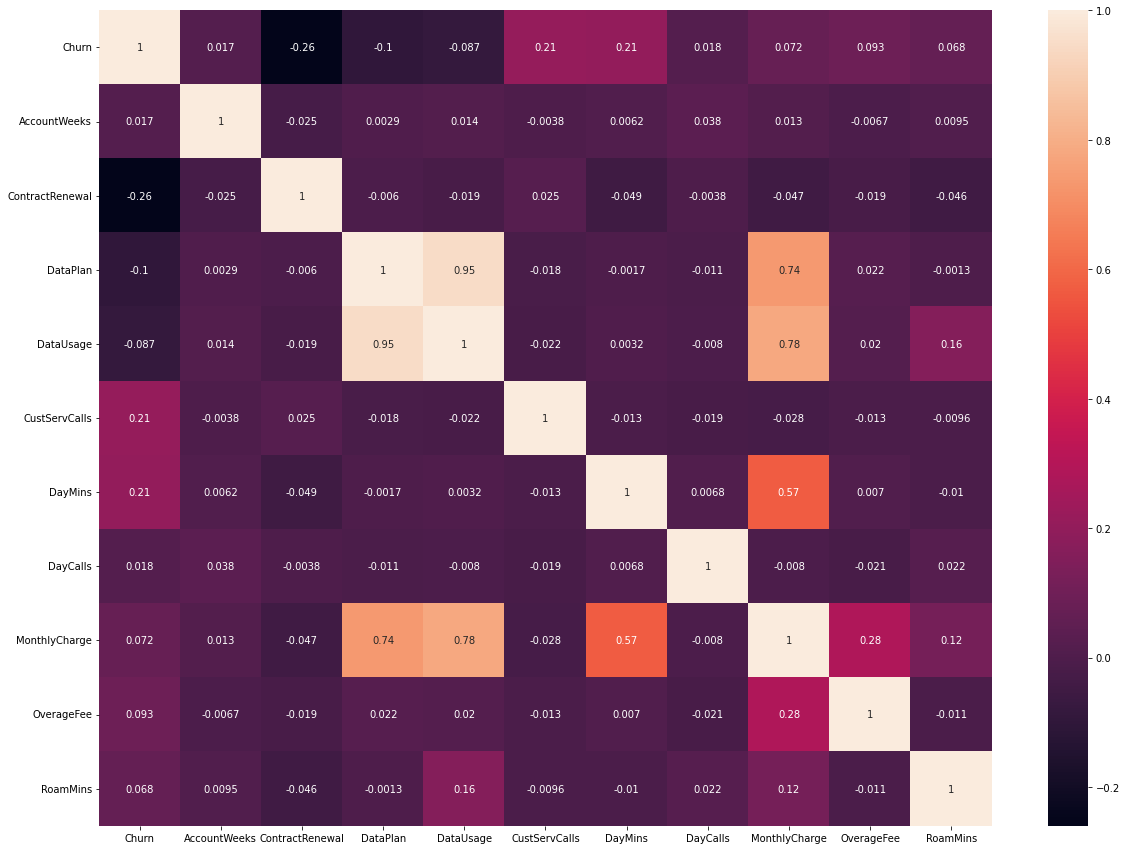

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(
    df.corr()
    , annot=True
);

## Hasil dari Matrix Plot Heatmap
Dapat dilihat pada matrix plot diatas, terdapat korelasi:
1. DataUsage - DataPlan ==> linear dependency (high correlation)
2. DataUsage - DataPlan - MonthlyCharge ==> linear dependency (high correlation)
3. Daymins - MonthlyCharge ==> linear dependency (middle correlation)
4. DataUsage - MonthlyCharge ==> linear dependency (low correlation)

In [ ]:
for a_col in ['DataPlan', 'DataUsage', 'MonthlyCharge', 'DayMins', 'OverageFee']:
    print(f'{a_col} correlation terhadap "Churn" adalah {df[a_col].corr(df["Churn"])}')

DataPlan correlation terhadap "Churn" adalah -0.10214814067014703
DataUsage correlation terhadap "Churn" adalah -0.08719450893069826
MonthlyCharge correlation terhadap "Churn" adalah 0.07231271096701473
DayMins correlation terhadap "Churn" adalah 0.20515082926139028
OverageFee correlation terhadap "Churn" adalah 0.0928124264595318


# Target variable: "churn"

In [ ]:
# Mengecek proporsi data pada kolom 'Churn'
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

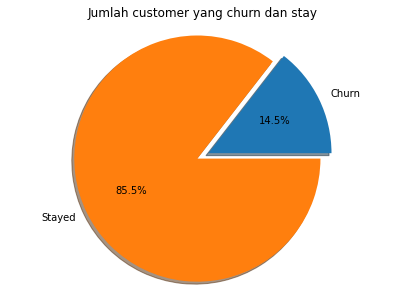

In [ ]:
#default churn rate
labels = 'Churn', "Stayed"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Jumlah customer yang churn dan stay")

plt.show()


In [ ]:
mask = df.loc[:,'Churn'] == 1
df_churn = df.loc[mask,:]
print('Jumlah customer yang churn:',len(df_churn))

Jumlah customer yang churn: 483


## seberapa besar sih tingkat proporsi konsumen yang membatalkan service??

#### Dapat dilihat pada visualisasi diatas, dataset yang sangat tidak seimbang  akan menghasilkan model yang bias terhadap 'Churn'.
85% customer stayed atau masih tetap menggunakan jasa dan 14,5% lainnya "churn"

## Jadi, faktor apakah yang menyebabkan Churn?

mari kita lihat satu-satu!

# 1. Churn oleh Renewal Contract, Data Plan dan Cust Service Call 

Kolom 'ContractRenewal' menjelaskan apakah customer memperbaharui kontrak mereka atau tidak

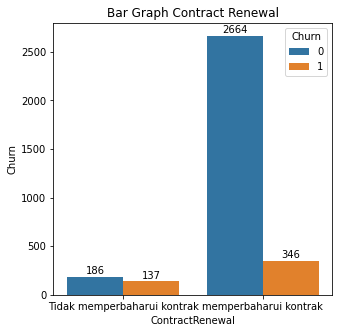

In [ ]:
#barchart untuk Renewal Contract
fig = plt.figure(figsize=(5, 5))  
ax = sns.countplot(data = df, x='ContractRenewal', hue = 'Churn')
ax.set_title("Bar Graph Contract Renewal", y = 1)
ax.set_xlabel('ContractRenewal')
ax.set_ylabel('Churn')
ax.set_xticklabels(('Tidak memperbaharui kontrak', 'memperbaharui kontrak'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show() 

####  Contract Renewal:

1. 90% dari customer memperbaharui kontrak
2. kita dapat melihat persentase churn (1) pada bagian yang memperbaharui kontrak lebih tinggi dibandingkan churn yang berada di "tidak memperbaharui kontrak"

Kolom 'DataPlan' menjelaskan apakah customer mempunyai data plan (1) atau tidak (0)

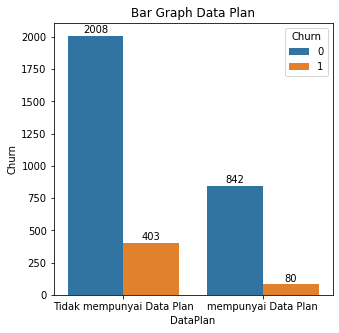

In [ ]:
#barchart untuk Data Plan
fig = plt.figure(figsize=(5, 5))  
ax = sns.countplot(data = df, x='DataPlan', hue = 'Churn')
ax.set_title("Bar Graph Data Plan", y = 1)
ax.set_xlabel('DataPlan')
ax.set_ylabel('Churn')
ax.set_xticklabels(('Tidak mempunyai Data Plan', 'mempunyai Data Plan'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show() 

####  Data Plan:

1. Dari keseluruhan dataset, 60% dari customer tidak mempunyai data plan
2. pada grup yang tidak mempunyai data plan, churnnya (1) lebih tinggi dibanding yang mempunyai data plan
3. 0 di DataUsage kemungkinan banyak karena faktor customer yang tidak mempunyai data plan 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

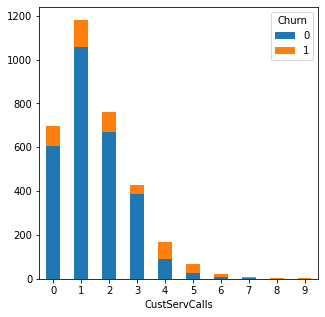

In [ ]:
#barchart untuk 'Cust Service Calls'
df_plot = df.groupby(['Churn', 'CustServCalls']).size().reset_index().pivot(columns = 'Churn', index = 'CustServCalls', values = 0)
df_plot.plot(kind = 'bar', stacked = True, figsize = (5,5))
plt.xticks(rotation = 0) 

####  Customer Service Calls:

1. Kebanyakan user membuat telfon ke CS sekali, hanya sebagian kecil user yang membuat telfon ke CS lebih dari 4 kali

## Relationship: 'DataPlan' & 'DataUsage' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara DataUsage dan DataPlan.
 (0) tidak mempunyai data plan
 (1) terdapat data plan

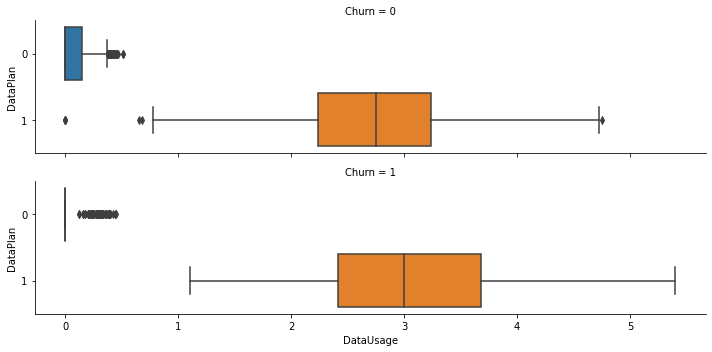

In [ ]:
# membuat boxplots
sns.catplot(x = 'DataUsage', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df)

###### Relationship 

Dapat dilihat, customer yang membatalkan layanan menggunakan rata-rata data lebih banyak daripada yang tidak membatalkan layanan.

## Relationship: 'MonthlyCharges' & 'Daymins' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara MonthlyCharge dan Daymins.

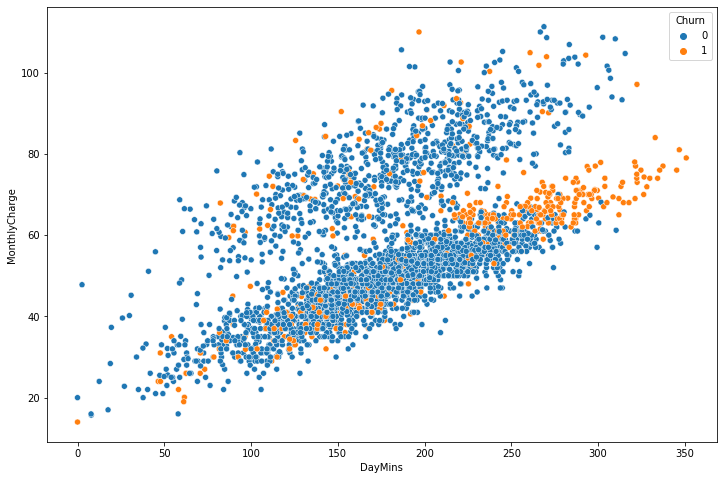

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'DayMins', y = 'MonthlyCharge', hue = 'Churn')

## Relationship: 'MonthlyCharges' & 'RoamMins' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara MonthlyCharge dan Daymins.

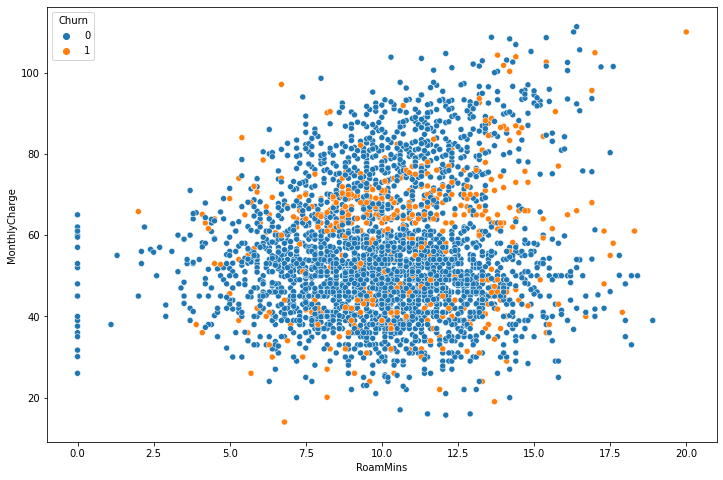

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'RoamMins', y = 'MonthlyCharge', hue = 'Churn')

###### Relationship

Dapat kita lihat pada scatterplot diatas, diantara 60 - 80$ yang dibebankan maka semakin banyak juga rata-rata penggunaan yang juga meninggalkan layanan (dayMins diatas 200)

## Relationship: 'MonthlyCharges' & 'DataPlan' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara MonthlyCharge dan Daymins.

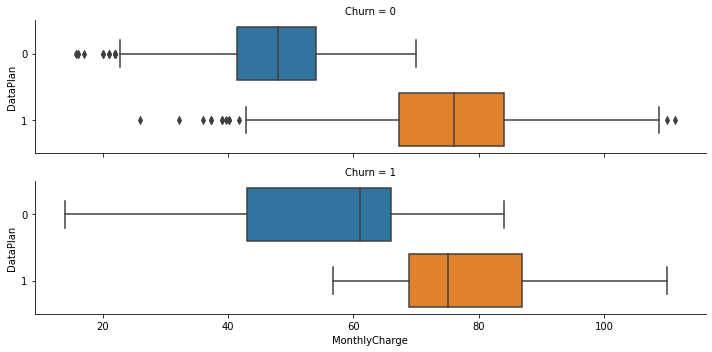

In [ ]:
sns.catplot(x = 'MonthlyCharge', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df)

###### Relationship 

Biaya perbulan yang dibebankan untuk yang menggunakan data plan cenderung tinggi. 

## Data Splitting

Data splitting dengan komposisi 80% data training dan 20% data testing

In [ ]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [ ]:
# splitting X and y into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

### Logistic Regression

In [ ]:
# Train Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = lr.fit(X_train, y_train)

In [ ]:
# Evaluasi Model
y_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Result

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Klasifikasi Model Logistic Regression \n\n\n', classification_report(y_test, y_lr))

Klasifikasi Model Logistic Regression 


               precision    recall  f1-score   support

           0       0.87      0.98      0.92       569
           1       0.50      0.13      0.21        98

    accuracy                           0.85       667
   macro avg       0.68      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_lr))

Accuracy:  0.8530734632683659


In [ ]:
print("Precision: ", precision_score(y_test, y_lr))

Precision:  0.5


In [ ]:
print("recall: ", recall_score(y_test, y_lr))

recall:  0.1326530612244898


Confusion Matrix dari Model Logistic Regression 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


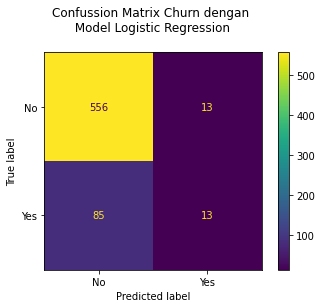

In [ ]:
#membuat confusion matrix dengan menggunakan model logistic regression

print('Confusion Matrix dari Model Logistic Regression \n\n', plot_confusion_matrix(lr, X_test, y_test))
plt.title('Confussion Matrix Churn dengan \n Model Logistic Regression \n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
#membuat evaluasi AUC 

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Logistic Regression')
print(auc(fpr, tpr))

Laporan AUC Model Logistic Regression
0.5549029805243715


### Decision Tree

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg



In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_dtree = dtree.predict(X_test)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_4 <= 3.50
|   |--- feature_5 <= 245.10
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_5 <= 236.65
|   |   |   |   |   |--- feature_6 <= 50.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  50.00
|   |   |   |   |   |   |--- feature_8 <= 13.84
|   |   |   |   |   |   |   |--- feature_0 <= 204.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 91.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 116.00
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 30.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  30.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_6 >  116.00
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 45.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |  

In [ ]:
print('Laporan Klasifikasi Model Decision Tree \n\n\n', classification_report(y_test, y_dtree))

Laporan Klasifikasi Model Decision Tree 


               precision    recall  f1-score   support

           0       0.93      0.92      0.93       569
           1       0.58      0.62      0.60        98

    accuracy                           0.88       667
   macro avg       0.75      0.77      0.76       667
weighted avg       0.88      0.88      0.88       667



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_dtree))

Accuracy:  0.8770614692653673


In [ ]:
print("Precision: ", precision_score(y_test, y_dtree))

Precision:  0.5754716981132075


In [ ]:
print("Recall: ", recall_score(y_test, y_dtree))

Recall:  0.6224489795918368


Confusion Matrix dari Model Decision Tree 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


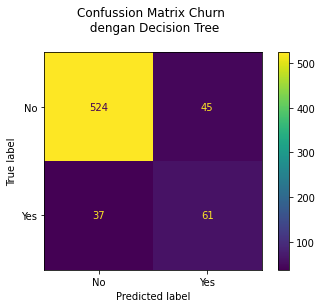

In [ ]:
print('Confusion Matrix dari Model Decision Tree \n\n', plot_confusion_matrix(dtree, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Decision Tree\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, y_dtree, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Decision Tree')
print(auc(fpr, tpr))

Laporan AUC Model Decision Tree
0.7716814317994334


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf_model = rf.fit(X_train, y_train) 

In [ ]:
y_rf = rf.predict(X_test)

In [ ]:
print('Hasil Klasifikasi Model Random Forest \n\n\n', classification_report(y_test, y_rf))

Hasil Klasifikasi Model Random Forest 


               precision    recall  f1-score   support

           0       0.94      0.98      0.96       569
           1       0.88      0.64      0.74        98

    accuracy                           0.93       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_rf))

Accuracy:  0.9340329835082459


In [ ]:
print("Recall: ", recall_score(y_test, y_rf))

Recall:  0.6428571428571429


In [ ]:
print("precision: ", precision_score(y_test, y_rf))

precision:  0.875


Confusion Matrix dari Model Random Forest 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


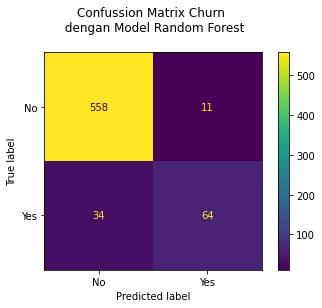

In [ ]:
print('Confusion Matrix dari Model Random Forest \n\n', plot_confusion_matrix(rf_model, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Model Random Forest\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Random Forest')
print(auc(fpr, tpr))

Laporan AUC Model Random Forest
0.8135199598292744


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn_model = knn.fit(X_train, y_train)

In [ ]:
y_knn = knn.predict(X_test)

In [ ]:
print('Hasil Klasifikasi Model KNN \n\n\n', classification_report(y_test, y_knn))

Hasil Klasifikasi Model KNN 


               precision    recall  f1-score   support

           0       0.89      0.96      0.93       569
           1       0.60      0.31      0.41        98

    accuracy                           0.87       667
   macro avg       0.74      0.64      0.67       667
weighted avg       0.85      0.87      0.85       667



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_knn))

Accuracy:  0.8680659670164917


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print("Recall: ", recall_score(y_test, y_knn))

Recall:  0.30612244897959184


In [ ]:
print("precision: ", precision_score(y_test, y_knn))

precision:  0.6


Confusion Matrix dari Model KNN 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


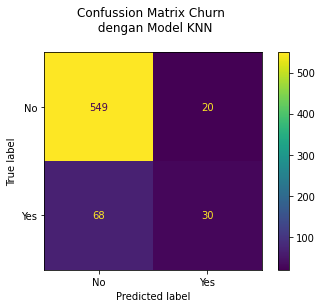

In [ ]:
print('Confusion Matrix dari Model KNN \n\n', plot_confusion_matrix(knn_model, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Model KNN\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_knn, pos_label=1) # pos_label: positive label
print('Laporan AUC Model KNN')
print(auc(fpr, tpr))

Laporan AUC Model KNN
0.6354865320469137


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
 GBC = GradientBoostingClassifier(random_state=1)

In [ ]:
GBC_model = GBC.fit(X_train, y_train)

In [ ]:
y_GBC = GBC.predict(X_test)

In [ ]:
print('Hasil Klasifikasi Model GBC \n\n\n', classification_report(y_test, y_GBC))

Hasil Klasifikasi Model GBC 


               precision    recall  f1-score   support

           0       0.95      0.98      0.96       569
           1       0.86      0.67      0.75        98

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_GBC))

Accuracy:  0.9355322338830585


In [ ]:
print("recall: ", recall_score(y_test, y_GBC))

recall:  0.673469387755102


In [ ]:
print("precision: ", precision_score(y_test, y_GBC))

precision:  0.8571428571428571


Confusion Matrix dari Model GBC 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


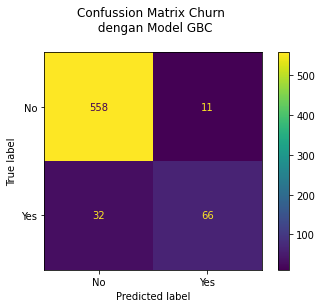

In [ ]:
print('Confusion Matrix dari Model GBC \n\n', plot_confusion_matrix(GBC_model, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Model GBC\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_GBC, pos_label=1) # pos_label: positive label
print('Laporan AUC Model GBC')
print(auc(fpr, tpr))

Laporan AUC Model GBC
0.8270686130339658


## Resampling

## Undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
clf_list = [
  
    LogisticRegression(random_state=1, solver='liblinear')
    , DecisionTreeClassifier(random_state=1, max_depth = 8)
    , RandomForestClassifier(random_state=1, max_depth=8)
    , KNeighborsClassifier()
    , GradientBoostingClassifier(random_state=1)
    ]

#modelling(clf_list)

In [ ]:
rus=RandomUnderSampler()

In [ ]:
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

In [ ]:
y_rus_train.value_counts()

0    385
1    385
Name: Churn, dtype: int64

In [ ]:
def modelling(classifiers, X_train, y_train, X_test, y_test):
    
    for i, clf in enumerate(classifiers):
        model = clf#.__class__.__name__
        model.fit(X_train, y_train)
        pred_y=model.predict(X_test)
        
        score = accuracy_score(y_test, pred_y)
        
        fpr, tpr, threshholds=roc_curve(y_test, pred_y)
        auc_score=auc(fpr, tpr)
        cross_val = cross_val_score(model, X_test, y_test)

        print(f'\n{model}\nModel accuracy: {score}.\nauc={auc_score}\nCross-valdation score: {cross_val.mean()}.')

In [ ]:
modelling(
    clf_list
    , X_train=X_rus_train
    , y_train=y_rus_train
    , X_test=X_test
    , y_test=y_test
)


LogisticRegression(random_state=1, solver='liblinear')
Model accuracy: 0.7421289355322339.
auc=0.7390516839424698
Cross-valdation score: 0.8516103692065986.

DecisionTreeClassifier(max_depth=8, random_state=1)
Model accuracy: 0.8365817091454273.
auc=0.8028585775259136
Cross-valdation score: 0.8741106497587252.

RandomForestClassifier(max_depth=8, random_state=1)
Model accuracy: 0.8620689655172413.
auc=0.8473602094616405
Cross-valdation score: 0.9055661541914487.

KNeighborsClassifier()
Model accuracy: 0.6491754122938531.
auc=0.646560381621893
Cross-valdation score: 0.86806194590955.

GradientBoostingClassifier(random_state=1)
Model accuracy: 0.8500749625187406.
auc=0.8403303324844876
Cross-valdation score: 0.9055324879362585.


In [ ]:
def confusion_matrices(clfs, X_train, y_train, X_val, y_val):
    
    for i, clf in enumerate(clfs):
        name=clf
        clf.fit(X_train, y_train)
        pred_y=clf.predict(X_val)
        #matrix_norm=confusion_matrix(y_val, pred_y, normalize='all')
        matrix=confusion_matrix(y_val, pred_y)
        class_rep=classification_report(y_val, pred_y)
        print(f'\n{name} Confusion Matrix:\n{matrix}\n{class_rep}')

      
confusion_matrices(
    clf_list
    , X_train=X_rus_train
    , y_train=y_rus_train
    , X_val=X_test
    , y_val=y_test
)


LogisticRegression(random_state=1, solver='liblinear') Confusion Matrix:
[[418 151]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.83       569
           1       0.33      0.74      0.45        98

    accuracy                           0.74       667
   macro avg       0.63      0.74      0.64       667
weighted avg       0.85      0.74      0.77       667


DecisionTreeClassifier(max_depth=8, random_state=1) Confusion Matrix:
[[463 106]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       569
           1       0.41      0.74      0.53        98

    accuracy                           0.80       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.80      0.82       667


RandomForestClassifier(max_depth=8, random_state=1) Confusion Matrix:
[[502  67]
 [ 19  79]]
              precision    recall  f1-score   support

      

## Oversampling

In [ ]:
y_train.value_counts()

0    2281
1     385
Name: Churn, dtype: int64

In [ ]:
sm=SMOTE(
    sampling_strategy='auto'
    , k_neighbors=2
    , random_state=1
)

In [ ]:
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

In [ ]:
y_sm_train.value_counts()

0    2281
1    2281
Name: Churn, dtype: int64

In [ ]:
modelling(
    clf_list
    , X_train=X_sm_train
    , y_train=y_sm_train
    , X_test=X_test
    , y_test=y_test
)


LogisticRegression(random_state=1, solver='liblinear')
Model accuracy: 0.7631184407796102.
auc=0.7260141314873929
Cross-valdation score: 0.8516103692065986.

DecisionTreeClassifier(max_depth=8, random_state=1)
Model accuracy: 0.8695652173913043.
auc=0.8264140454072666
Cross-valdation score: 0.8741106497587252.

RandomForestClassifier(max_depth=8, random_state=1)
Model accuracy: 0.8830584707646177.
auc=0.8343226570065637
Cross-valdation score: 0.9055661541914487.

KNeighborsClassifier()
Model accuracy: 0.7106446776611695.
auc=0.6783651949356193
Cross-valdation score: 0.86806194590955.

GradientBoostingClassifier(random_state=1)
Model accuracy: 0.8785607196401799.
auc=0.8359097593343137
Cross-valdation score: 0.9055324879362585.


In [ ]:
confusion_matrices(
    clf_list
    , X_train=X_rus_train
    , y_train=y_rus_train
    , X_val=X_test
    , y_val=y_test
)


LogisticRegression(random_state=1, solver='liblinear') Confusion Matrix:
[[432 137]
 [ 28  70]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       569
           1       0.34      0.71      0.46        98

    accuracy                           0.75       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.85      0.75      0.78       667


DecisionTreeClassifier(max_depth=8, random_state=1) Confusion Matrix:
[[494  75]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       569
           1       0.49      0.73      0.59        98

    accuracy                           0.85       667
   macro avg       0.72      0.80      0.75       667
weighted avg       0.88      0.85      0.86       667


RandomForestClassifier(max_depth=8, random_state=1) Confusion Matrix:
[[512  57]
 [ 19  79]]
              precision    recall  f1-score   support

      

## GridSearchCV

In [ ]:
X = df.drop('DataPlan', axis = 'columns')
y = df['DataPlan']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

GradientBoostingClassifier()
GradientBoostingRegressor()


In [ ]:
GBC = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(GBC,parameters,cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}


0.728 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.999 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.999 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.999 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.728 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.998 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.998 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.998 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.728 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.998 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.998 + or -0.001 for the {'learning_rate': 0.01, 'max_d

## Feature selection

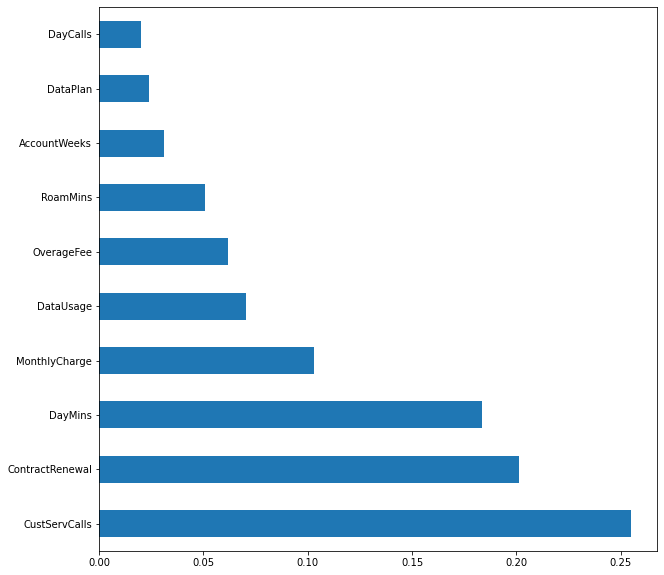

In [ ]:
GBC_model=GradientBoostingClassifier(random_state=1)
GBC_model.fit(X_rus_train, y_rus_train)
feat_importances=pd.Series(
    GBC_model.feature_importances_
    , index=df.columns[1:]
)
feat_importances.nlargest(20).plot(kind='barh', figsize=(10,10));

## Final Result

**Langkah-langkah untuk mempertahankan customer berdasarkan barplot diatas adalah:**

1. Lebih banyak panggilan ke CS, maka lebih banyak pelanggan yang akan churn, sehingga yang harus dilakukan:
2. Memperkenalkan data plan kepada customer yang menggunakan data tanpa membeli data plan dengan harga yang affordable
3. Untuk DayMin (diatas 200 menit), banyak pelanggan yang churn saat menghabiskan senilai $60 - $80 yang dibebankan
4. Pertimbangkan opsi yang berbeda untuk layanan roaming. Soalnya 90% pelanggan menggunakan layanan roaming tetapi tidak membeli paket data, dan tingkat churnnya tinggi. Sehingga prusahaan harus pertimbangkan untuk menurunkan tagihan orang-orang itu.

**Best Machine Learning Model**

Gradient Boost lalu disusul dengan Random Forest